Loaded graph_matrix.npy
graph_matrix.npy [[0.25   0.1875 0.1875 ... 0.     0.     0.    ]
 [0.1875 0.25   0.1875 ... 0.     0.     0.    ]
 [0.1875 0.1875 0.25   ... 0.     0.     0.1875]
 ...
 [0.     0.     0.     ... 0.25   0.1875 0.1875]
 [0.     0.     0.     ... 0.1875 0.25   0.1875]
 [0.     0.     0.1875 ... 0.1875 0.1875 0.25  ]]


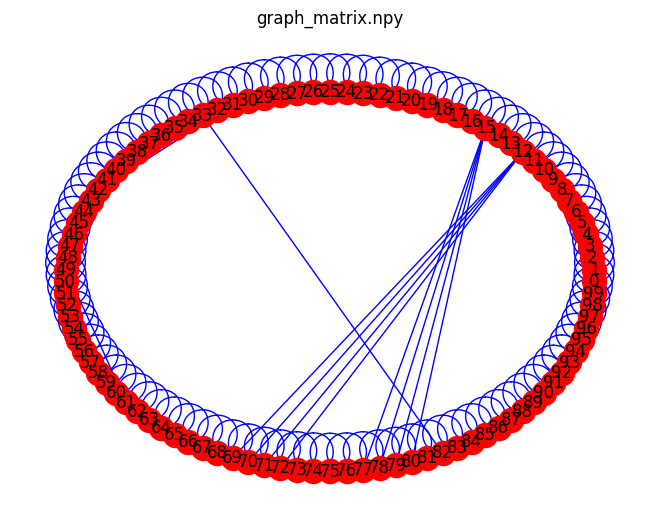

In [3]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def load_npy_files(folder_path):
    data_dict = {}
    
    # Iterate over all files in the specified folder
    for filename in os.listdir(folder_path):
        # Check if the file has a .npy extension
        if filename.endswith('.npy') and "graph_matrix" in filename:
            file_path = os.path.join(folder_path, filename)
            # Load the .npy file
            data = np.load(file_path)
            data_dict[filename] = data  # Store data in a dictionary
            print(f"Loaded {filename}")
    
    return data_dict

# Example usage
folder_path = '2024-10-02-181820_447912_unnamed_run'
npy_data = load_npy_files(folder_path)

for filename, adjacency_matrix in npy_data.items():
    print(filename, adjacency_matrix)
    
    # Convert the adjacency matrix to a NetworkX graph
    G = nx.from_numpy_array(adjacency_matrix)
    
    # Draw the graph
    plt.figure()
    nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b', with_labels=True)
    plt.title(filename)
    plt.show()


[0.007 0.01  0.014 0.019 0.027 0.039 0.055 0.078 0.111 0.157 0.223 0.317
 0.449 0.638 0.905]


NameError: name 'graph' is not defined

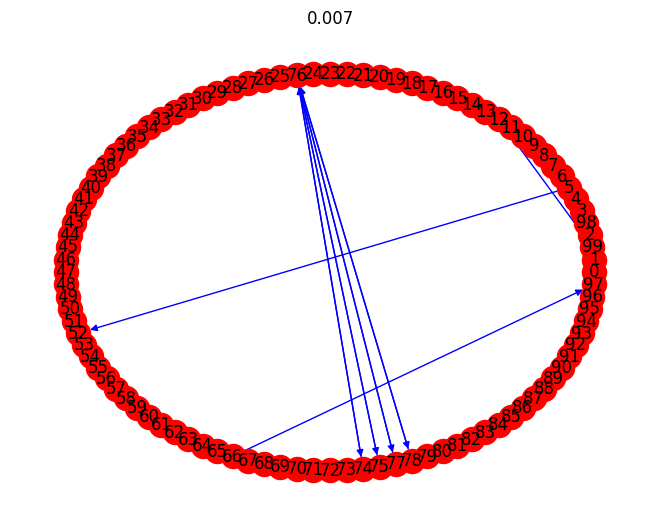

In [22]:
import graphs as gg
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

p = np.exp(np.arange(-5, 0, 0.35))
p = np.round(p, 3)
print(p)

graph_di = {}

for i in p:
    G = gg.strong_connected_ws_directed(n = 100, k = 4, p = i, tries = 1000, seed = None)
    plt.figure()
    nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b', with_labels=True, arrows=True)
    plt.title(i)
    print(nx.to_numpy_array(graph))
    plt.show()
    graph_di[i] = G
    


In [13]:
for _,graph in graph_di.items():
    print(_, len(graph.edges()))

0.0 40
0.05 40
0.1 40
0.15000000000000002 40
0.2 40
0.25 40
0.30000000000000004 40
0.35000000000000003 40
0.4 40
0.45 40
0.5 40
0.55 40
0.6000000000000001 40
0.65 40
0.7000000000000001 40
0.75 40
0.8 40
0.8500000000000001 40
0.9 40
0.9500000000000001 40
1.0 40


In [4]:
import parser as p
ret_val = p.main_loop(["parser.py", "master.json"], return_value=True)
print(ret_val)

Running for 1 iterations
Simulating: 1
Running Simulation: master.json
Iteration: 1
Process kuramoto_euler elapsed: 2:49
Process kuramoto_old elapsed: 5:54
Process kuramoto_rk4 elapsed: 2:14
Process ou_euler elapsed: 0:05
Process analytical_sigma_cont elapsed: 0:00
Process analytical_sigma_discrete elapsed: 0:13
Process analytical_sigma_discrete_approx elapsed: 0:13
Data saved to: 2024-10-02-141038_520512_unnamed_run
Time elapsed for this run: 11:33
Total Time Elapsed: 11:33
SUCCESSFULLY COMPLETED ALL ITERATIONS!
['2024-10-02-141038_520512_unnamed_run']


In [5]:
import parser as p
ret_val = p.main_loop(["parser.py", "example.json"], return_value=True)
print(ret_val)

Running for 1 iterations
Simulating: 1
Running Simulation: example.json
Iteration: 1
Process kuramoto_euler elapsed: 0:00
Process kuramoto_old elapsed: 0:01
Process kuramoto_rk4 elapsed: 0:00
Process ou_euler elapsed: 0:00
Process analytical_sigma_cont elapsed: 0:01
Process analytical_sigma_discrete elapsed: 0:13
Process analytical_sigma_discrete_approx elapsed: 0:13
Data saved to: 2024-10-04-150318_446481_unnamed_run
Time elapsed for this run: 0:32
Iteration: 2
Process kuramoto_euler elapsed: 0:00
Process kuramoto_old elapsed: 0:01
Process kuramoto_rk4 elapsed: 0:00
Process ou_euler elapsed: 0:00
Process analytical_sigma_cont elapsed: 0:01


KeyboardInterrupt: 

In [56]:
import parser as p
ret_val = p.main_loop(["parser.py", "template_old.json"], return_value=True)
print(ret_val)

Running for 1 iterations
Simulating: 1
Running Simulation: template_old.json
Iteration: 1
Process kuramoto_euler elapsed: 0:12
Process kuramoto_rk4 elapsed: 0:09
Process kuramoto_old elapsed: 0:12
Process ou_euler elapsed: 0:02
Process analytical_sigma_cont elapsed: 0:00
Data saved to: 2024-10-04-152529_034367_unnamed_run
Time elapsed for this run: 0:37
Time elapsed for this Simulation: 0:37
SUCCESSFULLY COMPLETED ALL 1 ITERATIONS IN 0:37!
['2024-10-04-152529_034367_unnamed_run']


In [57]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def read_file(f):
    with open(f, 'r') as file:
        out = file.read()
    return np.float32(out)

folder = ret_val[0]
print(folder)
sigma_squared_euler = np.load(folder + "/kuramoto_euler_sigma_squared.npy")
sigma_squared_old = np.load(folder + "/kuramoto_old_sigma_squared.npy")

sigma_squared_rk4 = np.load(folder + "/kuramoto_rk4_sigma_squared.npy")
sigma_squared_ou = np.load(folder + "/ou_euler_sigma_squared.npy")

analytical_sigma_derivation = read_file(folder + "/analytical_sigma_cont.dat")

2024-10-04-152529_034367_unnamed_run


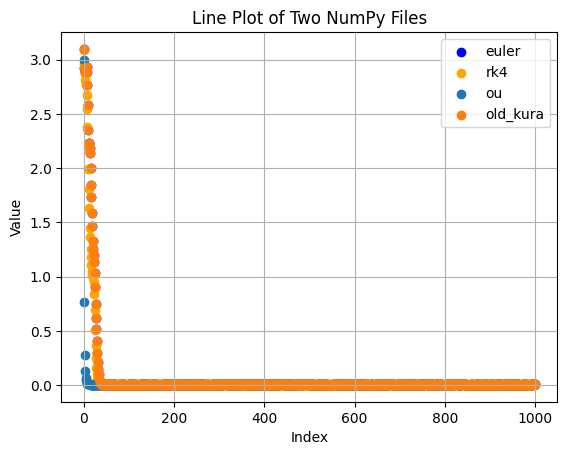

In [58]:
#plt.plot(sigma_squared_euler, label='euler', color='blue')
#plt.plot(sigma_squared_rk4, label='rk4', color='orange')


plt.scatter(np.arange(len(sigma_squared_euler)),sigma_squared_euler, label='euler', color='blue')
plt.scatter(np.arange(len(sigma_squared_euler)), sigma_squared_rk4, label='rk4', color='orange')
plt.scatter(np.arange(len(sigma_squared_euler)), sigma_squared_ou, label='ou')
plt.scatter(np.arange(len(sigma_squared_old)), sigma_squared_old, label='old_kura')


# Adding titles and labels
plt.title('Line Plot of Two NumPy Files')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

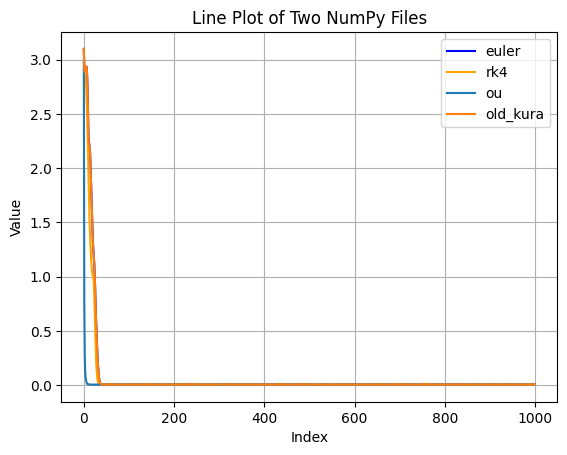

In [59]:
#plt.plot(sigma_squared_euler, label='euler', color='blue')
#plt.plot(sigma_squared_rk4, label='rk4', color='orange')


plt.plot(sigma_squared_euler, label='euler', color='blue')
plt.plot(sigma_squared_rk4, label='rk4', color='orange')
plt.plot(sigma_squared_ou, label='ou')
plt.plot(sigma_squared_old, label='old_kura')


# Adding titles and labels
plt.title('Line Plot of Two NumPy Files')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [60]:
sigma_squared_euler[500:].mean()

np.float64(0.00795141191252533)

In [61]:
sigma_squared_rk4[500:].mean()

np.float64(0.008083391883703987)

In [62]:
sigma_squared_ou[500:].mean()

np.float64(0.007900876656084105)

In [63]:
sigma_squared_old[500:].mean()

np.float64(0.00795141191252533)

In [64]:
analytical_sigma_derivation

np.float32(0.007917282)

In [65]:
import autorun2 as ar
folder = "2024-10-02-194437_457305_unnamed_run"
ar.gather_info(folder)

{'n': 100, 'k': 4, 'p': 0.01, 'c': 0.75, 'zeta': 0.1}

In [66]:
folder = ["2024-10-03-120759_748461_unnamed_run","2024-10-02-194437_457305_unnamed_run", "2024-10-02-195534_540054_unnamed_run", "2024-10-02-195651_747237_unnamed_run"]
ar.collect_data(folder, "data_collection_services", "debug.h5")

In [67]:
import pandas as pd
import os
import h5py
keys = []
file = "debug.h5"
folder = 'data_collection_services'
filename = os.path.join(folder, file)

def descend_obj(obj,sep='\t', key = None):
    """
    Iterate through groups in a HDF5 file and prints the groups and datasets names and datasets attributes
    """
    if type(obj) in [h5py._hl.group.Group,h5py._hl.files.File]:
        for key in obj.keys():
            print(sep,'-',key,':',obj[key])
            descend_obj(obj[key],sep=sep+'\t')
    elif type(obj)==h5py._hl.dataset.Dataset:
        for key in obj.attrs.keys():
            print(sep+'\t','-',key,':',obj.attrs[key])
file = "run_0_0.h5"
folder = 'data/h5'
filename = os.path.join(folder, file)


with h5py.File(filename, 'r') as hf:
    data_loc = "/project/TB_NN_INFOTHEORY/rmck6484_thesis/data"
    hf_current = hf[data_loc]
    print(hf_current)
    keys = hf_current.keys()
    for k in keys:
        print(k)
        print(hf_current[k])
        g = hf_current[k]
        for fk in g.keys():
            print(g[fk])
        print(g["kuramoto_euler_sigma_squared.npy"][1000:].mean())
        print(g["ou_euler_sigma_squared.npy"][1000:].mean())
        print(g["analytical_sigma_cont.dat"][()])
        #print(data.shape)
        for attrs in g.attrs:
            print(attrs, g.attrs[attrs])
        
            

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'data/h5/run_0_0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
with h5py.File(filename, 'r') as hf:
    #data_loc = "/project/TB_NN_INFOTHEORY/rmck6484_thesis/data"
    #hf_current = hf[data_loc]
    hf_current = hf
    print(hf_current)
    keys = hf_current.keys()
    for k in keys:
        print(k)
        print(hf_current[k])
        g = hf_current[k]
        for fk in g.keys():
            print(g[fk])
        #print(data.shape)
        for attrs in g.attrs:
            print(attrs, g.attrs[attrs])
        
            

<HDF5 file "debug.h5" (mode r)>
2024-10-02-194437_457305_unnamed_run
<HDF5 group "/2024-10-02-194437_457305_unnamed_run" (15 members)>
<HDF5 dataset "analytical_sigma_cont.dat": shape (), type "<f4">
<HDF5 dataset "graph_matrix.npy": shape (100, 100), type "<f8">
<HDF5 dataset "kuramoto_euler_final_state.npy": shape (100,), type "<f8">
<HDF5 dataset "kuramoto_euler_initial_state.npy": shape (100,), type "<f8">
<HDF5 dataset "kuramoto_euler_sigma_squared.npy": shape (1000,), type "<f8">
<HDF5 dataset "kuramoto_old_final_state.npy": shape (100,), type "<f8">
<HDF5 dataset "kuramoto_old_initial_state.npy": shape (100,), type "<f8">
<HDF5 dataset "kuramoto_old_sigma_squared.npy": shape (1000,), type "<f8">
<HDF5 dataset "kuramoto_rk4_final_state.npy": shape (100,), type "<f8">
<HDF5 dataset "kuramoto_rk4_initial_state.npy": shape (100,), type "<f8">
<HDF5 dataset "kuramoto_rk4_sigma_squared.npy": shape (1000,), type "<f8">
<HDF5 dataset "ou_euler_final_state.npy": shape (100,), type "<f8">

In [81]:
import h5py
def unify(folder, unified_file, write = True):
    with h5py.File(unified_file, 'w' if write else 'a') as hf_out:
        print(type(hf_out))
        for filename in os.listdir(folder):
            if not filename.endswith('.h5'):
                continue
            with h5py.File(os.path.join(folder, filename), 'r') as hf_in:
                for k in hf_in.keys():
                    hf_out.copy(hf_in[k], hf_out)

def combined_folders(folder_list, outfile):
    folder_list = folder_list.copy()
    f = folder_list.pop(0)
    unify(f, outfile)
    for f in folder_list:
        unify(f, outfile, write = False)


unify("data/h5/unprocessed", "data/h5/combined.h5")

<class 'h5py._hl.files.File'>


RuntimeError: Unable to synchronously copy object (destination object already exists)

In [74]:
import pandas as pd
import os
import h5py
keys = []
file = "run_simulated_test.h5"
folder = 'data/h5'
filename = os.path.join(folder, file)

def descend_obj(obj,sep='\t', key = None):
    """
    Iterate through groups in a HDF5 file and prints the groups and datasets names and datasets attributes
    """
    if type(obj) in [h5py._hl.group.Group,h5py._hl.files.File]:
        for key in obj.keys():
            print(sep,'-',key,':',obj[key])
            descend_obj(obj[key],sep=sep+'\t')
    elif type(obj)==h5py._hl.dataset.Dataset:
        for key in obj.attrs.keys():
            print(sep+'\t','-',key,':',obj.attrs[key])

with h5py.File(filename, 'r') as hf:
    hf_current = hf
    keys = hf_current.keys()
    print(keys)
    for k in keys:
        print(k)
        print(hf_current[k])
        g = hf_current[k]
        for fk in g.keys():
            print(g[fk])
        print(g["kuramoto_rk4_sigma_squared.npy"][500:].mean())
        print(g["kuramoto_euler_sigma_squared.npy"][500:].mean())
        print(g["ou_euler_sigma_squared.npy"][500:].mean())
        print(g["analytical_sigma_cont.dat"][()])
        #print(data.shape)
        for attrs in g.attrs:
            print(attrs, g.attrs[attrs])
        
            

<KeysViewHDF5 ['2024-10-04-155829_781775_simulated_run', '2024-10-04-155842_569203_simulated_run', '2024-10-04-155853_738963_simulated_run', '2024-10-04-155905_186097_simulated_run', '2024-10-04-155916_103324_simulated_run']>
2024-10-04-155829_781775_simulated_run
<HDF5 group "/2024-10-04-155829_781775_simulated_run" (12 members)>
<HDF5 dataset "analytical_sigma_cont.dat": shape (), type "<f4">
<HDF5 dataset "graph_matrix.npy": shape (100, 100), type "<f8">
<HDF5 dataset "kuramoto_euler_final_state.npy": shape (100,), type "<f8">
<HDF5 dataset "kuramoto_euler_initial_state.npy": shape (100,), type "<f8">
<HDF5 dataset "kuramoto_euler_sigma_squared.npy": shape (1000,), type "<f8">
<HDF5 dataset "kuramoto_rk4_final_state.npy": shape (100,), type "<f8">
<HDF5 dataset "kuramoto_rk4_initial_state.npy": shape (100,), type "<f8">
<HDF5 dataset "kuramoto_rk4_sigma_squared.npy": shape (1000,), type "<f8">
<HDF5 dataset "ou_euler_final_state.npy": shape (100,), type "<f8">
<HDF5 dataset "ou_eule